### Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import KFold,train_test_split,GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


%matplotlib inline

### Load The Dataset and cleaning it Also merge it
see if any null values were found or  data type of the column is not correct

In [17]:
df_train=pd.read_csv('Train.csv')
df_test=pd.read_csv('Test.csv')

df=pd.concat([df_train,df_test],ignore_index=True) 

In [18]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [19]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [21]:
print(f"Number of Null Values = {df.isna().sum().sum()}")

print(f"Number of Duplicated Rows = {df.duplicated().sum()}")

Number of Null Values = 393
Number of Duplicated Rows = 0


- ##### The data have 393 null values
- ##### no  repeated row were found and 
      
- ##### each column has it's corrected datatype

## Deal with the Null
Drop the null values

In [22]:
df[df.isna().any(axis=1)]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,...,5,5,2,4,1,1,5,31,NaN,satisfied
1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,...,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,...,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,...,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,...,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,...,5,1,1,1,3,2,5,26,NaN,satisfied
128037,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,...,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,...,4,3,3,5,5,4,4,0,NaN,satisfied
129032,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,...,5,5,5,5,3,5,3,0,NaN,satisfied


In [23]:
df.shape

(129880, 24)

In [24]:
df.dropna(inplace=True)

In [26]:
df.shape

(129487, 24)

# Explore The DataSet
### Description of the dataset

In [27]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,64958.335169,39.428761,1190.210662,2.728544,3.057349,2.756786,2.976909,3.204685,3.252720,3.441589,3.358067,3.383204,3.351078,3.631886,3.306239,3.642373,3.286222,14.643385,15.091129
std,37489.781165,15.117597,997.560954,1.329235,1.526787,1.401662,1.278506,1.329905,1.350651,1.319168,1.334149,1.287032,1.316132,1.180082,1.266146,1.176614,1.313624,37.932867,38.465650
min,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32494.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,64972.000000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,97415.500000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### the Number of Male and Female Customer , and their age dist

<AxesSubplot:xlabel='Gender', ylabel='count'>

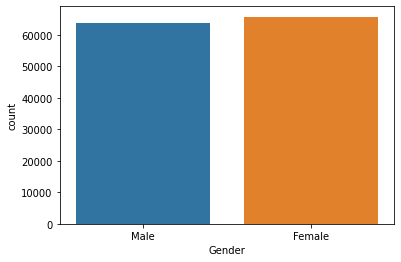

In [31]:


sns.countplot(x='Gender', data=df)


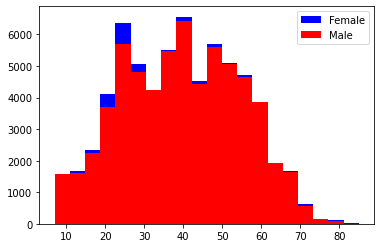

In [40]:
plt.hist(df[df['Gender']=='Female']['Age'],bins=20,label='Female',color='b')
plt.hist(df[df['Gender']=='Male']['Age'],bins=20,label='Male',color='r')
plt.legend()

In [41]:
df.groupby(['Gender'])['Age'].mean()

Gender
Female    39.294948
Male      39.566600
Name: Age, dtype: float64

 
- ###### Most Of The Passenger are Females and the average of there age == 39


### What Gender that is Unsatisfied with service  

<AxesSubplot:xlabel='satisfaction,Gender'>

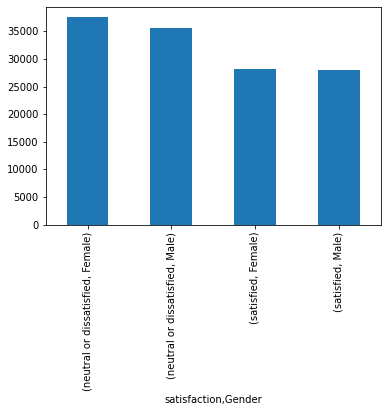

In [45]:
df.groupby('satisfaction')['Gender'].value_counts().plot(kind='bar')

- ###### The `year` have positive covariance  with  `price`

In [30]:
df.head()

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,SEAT,Ibiza,8990,SC 1.2 TSI 90cv Style,2016,67000,Gasolina,Manual,Granollers
1,Hyundai,i30,9990,1.6 CRDi 110cv Tecno,2014,104868,Diésel,Manual,Viladecans
2,BMW,Serie 5,13490,530d Touring,2011,137566,Diésel,Automatica,Viladecans
3,Volkswagen,Golf,24990,GTI 2.0 TSI 169kW (230CV),2018,44495,Gasolina,Manual,Viladecans
4,Opel,Corsa,10460,1.4 Expression 90 CV,2016,69800,Gasolina,Manual,Sabadell 1


#### What Is the Top Five Brand In The Dataset

<AxesSubplot:>

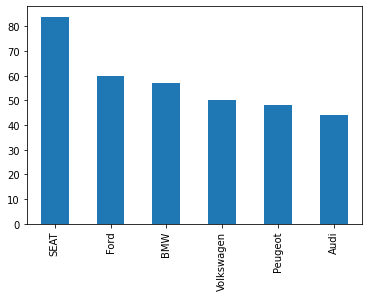

In [36]:
df['brand'].value_counts()[0:6].plot(kind='bar')

# What Brand is Higher in the Price ?

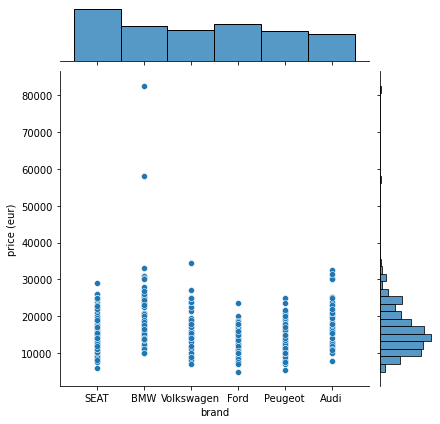

In [47]:
sns.jointplot(x='brand',y='price (eur)',data=df[df['brand'].isin(df['brand'].value_counts()[0:6].keys().to_list())])

In [49]:
df[df['brand'].isin(df['brand'].value_counts()[0:6].keys().to_list())].groupby(['brand'])['price (eur)'].mean()

brand
Audi          18192.272727
BMW           21667.368421
Ford          13809.833333
Peugeot       13979.166667
SEAT          14828.452381
Volkswagen    16783.000000
Name: price (eur), dtype: float64

- ###### BMW Is the higher one


# Train The Models

In [67]:
def Metrcis(y_pred,y_true,prnt=False):
    'Function  Jst Wrap All the metrics that iam using'
    acc=metrics.accuracy_score(y_true,y_pred)
    f1_score=metrics.f1_score(y_true,y_pred,average='macro')
    recall=metrics.recall_score(y_true,y_pred,average='macro')
    precs=metrics.precision_score(y_true,y_pred,average='macro')
    conf_matrix=metrics.confusion_matrix(y_true,y_pred)
    if prnt:
        print(f"\n Accuracy ={acc} \n F1_Score={f1_score} \n recall={recall} \n precs={precs} \n Conf_Matrix={conf_matrix}")

    return acc,f1_score,recall,precs,conf_matrix


def plot_roc_auc(list_of_models,x,y,list_of_model_names,prnt=None):
    for i,model in enumerate( list_of_models):
        metrics.plot_roc_curve(model, x, y) 
        plt.title(list_of_model_names[i])
        print(list_of_model_names[i]+'\n')
        Metrcis(model.predict(x),y,prnt=True)

   








 

In [68]:

def convert(df,columns):

    for column in columns:
        dic={ val:i for i,val in enumerate(df[column].unique())}
        df[column]=df[column].map(dic)



In [69]:
convert(df,['brand', 'model', 'engine','fuel', 'gearbox', 'location'])

In [70]:
df

,brand,model,price (eur),engine,year,mileage (kms),fuel,gearbox,location
0,0,0,8990,0,2016,67000,0,0,0
1,1,1,9990,1,2014,104868,1,0,1
2,2,2,13490,2,2011,137566,1,1,1
3,3,3,24990,3,2018,44495,0,0,1
4,4,4,10460,4,2016,69800,0,0,2
...,...,...,...,...,...,...,...,...,...
786,10,12,15990,106,2018,21404,0,0,3
787,3,3,13990,692,2016,84040,1,0,3
788,6,6,24990,7,2018,65872,0,0,1
789,26,51,17990,509,2019,28830,0,0,4


In [71]:
y=df['model']
x=df.drop(['model'],axis=1)


### Select Best Model Depending On The Acc Score, Also The Model Will have it's default Parameters

In [75]:
model_svc=SVC()
model_knn=KNeighborsClassifier()
model_lr=LogisticRegression()
model_dt=DecisionTreeClassifier()
model_rf=RandomForestClassifier()
model_b=GaussianNB()

list_of_models=[model_svc,model_lr,model_knn,modet_dt,model_rf,model_b]
list_of_model_names=['SVC','LOGETSTIC REG','KNN','DT','RANDOM FOREST','BYES']
X_train,X_test,y_train,y_test=train_test_split(x,y)



kfol=KFold(n_splits=10)
dic_k={'KNN':{'acc_fold':[],'f1_score_fold':[]},'LR':{'acc_fold':[],'f1_score_fold':[]},'SVM':{'acc_fold':[],'f1_score_fold':[]},'DT':{'acc_fold':[],'f1_score_fold':[]},'RF':{'acc_fold':[],'f1_score_fold':[]},'B':{'acc_fold':[],'f1_score_fold':[]}}

for t,te in kfol.split(X_train,y_train):
    train_x=X_train.iloc[t]
    train_y=y_train.iloc[t]

    val_x=X_train.iloc[te]
    val_y=y_train.iloc[te]

    print('Support Vector')
    model_svc.fit(train_x,train_y)
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_svc.predict(val_x),val_y)
    dic_k['SVM']['acc_fold'].append(acc)
    dic_k['SVM']['f1_score_fold'].append(f1_score)

    
    print('KNN')
    model_knn.fit(train_x,train_y)
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_knn.predict(val_x),val_y)
    dic_k['KNN']['acc_fold'].append(acc)
    dic_k['KNN']['f1_score_fold'].append(f1_score)



    print('LR')
    model_lr.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_lr.predict(val_x),val_y)
    dic_k['LR']['acc_fold'].append(acc)
    dic_k['LR']['f1_score_fold'].append(f1_score)


    print('DT')
    model_dt.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_dt.predict(val_x),val_y)
    dic_k['DT']['acc_fold'].append(acc)
    dic_k['DT']['f1_score_fold'].append(f1_score)

    print('RF')
    model_rf.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_rf.predict(val_x),val_y)
    dic_k['RF']['acc_fold'].append(acc)
    dic_k['RF']['f1_score_fold'].append(f1_score)


    print('B')
    model_b.fit(train_x,train_y);
    acc,f1_score,recall,precs,conf_matrix=Metrcis(model_b.predict(val_x),val_y)
    dic_k['B']['acc_fold'].append(acc)
    dic_k['B']['f1_score_fold'].append(f1_score)

print('-------------------------')
   


for k,v in dic_k.items():
    for k_n,v_n in dic_k[k].items():
        dic_k[k][k_n]=np.array(dic_k[k][k_n]).mean()
pd.DataFrame(dic_k)

Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector
KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

B
Support Vector


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN
LR


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and

DT
RF
B
-------------------------


c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\HGS123\anaconda3\envs\tensor\lib\site-packages\sklearn\metrics

,KNN,LR,SVM,DT,RF,B
acc_fold,0.057232,0.052260,0.028644,0.320480,0.283333,0.205650
f1_score_fold,0.028558,0.007477,0.002281,0.185994,0.157840,0.108877


> ######  This Data is Hard To train Classification model with it 